In [1]:
import os
import csv
import numpy as np
import pandas as pd

filepath = os.path.join("covid_deaths_usafacts.csv") 
df = pd.read_csv(filepath)

df

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,32,32,32,33,33,34,35,35,35,35
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,6,6,6,6,7,7,7,7,7,7
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,5,5,5,5,5,5,6,6,6,6
6,1011,Bullock County,AL,1,0,0,0,0,0,0,...,12,12,14,14,14,14,14,14,14,14
7,1013,Butler County,AL,1,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,37
8,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,20,20,23,25,25,25,25,25,25,27
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38


In [2]:
df = df[df['8/24/20']!=0]
totals = df['8/24/20']

totals

1       23
2       35
3        7
4        6
5        6
6       14
7       37
8       27
9       38
10      10
11      13
12      12
13      11
14       6
15       4
16       6
17      19
18      11
19       3
20      24
21      18
22      12
23      36
24      25
25      16
26      44
27      20
28      37
29       6
30      22
        ..
3151     4
3152    26
3153     1
3154     6
3155     3
3158     8
3159     3
3160     2
3163    25
3165    26
3166    70
3167    17
3168     1
3169    20
3170     2
3173     1
3174     1
3175     2
3178    13
3179     1
3181     1
3182     4
3184     1
3187     1
3188     1
3189     1
3190     2
3191     1
3192     2
3193     5
Name: 8/24/20, Length: 2459, dtype: int64

In [3]:
benford = pd.DataFrame()
benford['leading number'] =[1,2,3,4,5,6,7,8,9]
benford['total'] =[0,0,0,0,0,0,0,0,0]

benford

,leading number,total
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0


In [4]:
for row in totals:
    id = int(str(row)[0])-1
    benford.loc[id, 'total'] += 1
    

In [5]:
benford

,leading number,total
0,1,833
1,2,496
2,3,301
3,4,230
4,5,185
5,6,145
6,7,95
7,8,95
8,9,79


In [6]:
import matplotlib.pyplot as plt

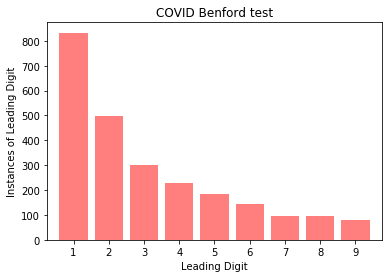

In [8]:
x_axis = np.arange(len(benford['total']))
plt.bar(x_axis, benford['total'], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.xlim(-0.75, len(x_axis)-0.25)


plt.title("COVID Benford test")
plt.xlabel("Leading Digit")
plt.ylabel("Instances of Leading Digit")

plt.savefig("plot.jpg",dpi=300)